In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# バージョンの情報
import platform
print('The python version is {}.'.format(platform.python_version()))
print('The numpy version is {}.'.format(np.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The python version is 3.7.10.
The numpy version is 1.19.5.
The scikit-learn version is 0.22.2.post1.


# データセットの作成

In [2]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Scikit-learn組み込みのデータセットを読み込む
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)
#X, y = make_blobs(n_samples=100, n_features=2, centers=[(-1, -1), (1, 1)], random_state=0)

# 訓練とテストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

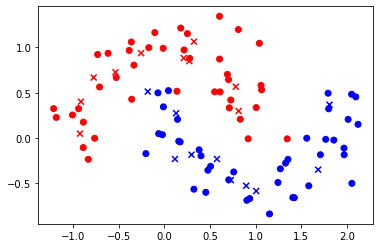

In [3]:
# Plot the training and testing points
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='x')
plt.show()

In [4]:
# 結果プロット用の関数
def res_plot(predict_func, X, y, X_train, X_test, y_train, y_test, Phi=None):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if Phi is None:
        Z = predict_func(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = predict_func(Phi(np.c_[xx.ravel(), yy.ravel()]))
    Z[Z < 0.5] = -1.
    Z[Z >= 0.5] = 1.
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['HotPink', 'RoyalBlue']), alpha=.8)

    # Plot the training points and testing points
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='x')
    
    plt.show()

# ロジスティック回帰（2クラスの場合）

In [5]:
class TwoClassLogisticRegression(object):
    def __init__(self):
        pass
        
    # 予測
    def predict(self, X):
        if self.bias:
            X = np.c_[X, np.ones(X.shape[0])]    # バイアス項を入力に含める
        return 1. / (1. + np.exp(- np.dot(X, self.w))) 
    
    # X: 学習データの入力変数
    # t: 学習データの目的変数 (0 or 1)
    # lam: 正則化係数
    # Tmax: 更新回数
    # bias: バイアス項を追加するか
    def fit(self, X, t, lam=0., Tmax=20, bias=True):
        self.bias = bias
        if bias:
            X = np.c_[X, np.ones(X.shape[0])]    # バイアス項を入力に含める
        
        d = X.shape[1]
        self.w = np.random.randn(d)    # パラメータの初期化
        self.w /= np.sqrt(np.sum(self.w * self.w))
        
        # 最適化ループ
        for ite in range(Tmax):
            y = 1. / (1. + np.exp(- np.dot(X, self.w)))    # シグモイド関数
            neg_log_like = - np.sum(t * np.log(y) + (1 - t) * np.log(1 - y))    # 負の対数尤度
            
            print('({}) '.format(ite+1) + 'Negative log-lilekihood: {}, Loss: {}'.format(neg_log_like, neg_log_like + lam / 2 * np.sum(self.w**2)))

            gw = np.dot(X.T, (y - t)) + lam * self.w    # 勾配
            H = np.dot(np.dot(X.T, np.diag(y) * np.diag(1. - y)), X) + lam * np.identity(len(self.w))    # へシアン
            self.w = self.w -  np.dot(np.linalg.inv(H), gw)    # Update w

In [6]:
# 学習の実行
d = X.shape[1]    # 入力の次元数
LogisticReg = TwoClassLogisticRegression()
LogisticReg.fit(X_train, y_train, lam=1., Tmax=10, bias=True)

(1) Negative log-lilekihood: 74.21191434073668, Loss: 74.71191434073668
(2) Negative log-lilekihood: 28.8613660704102, Loss: 31.687869907618328
(3) Negative log-lilekihood: 26.018795030254864, Loss: 29.773045256833715
(4) Negative log-lilekihood: 25.666497586499542, Loss: 29.740685200595586
(5) Negative log-lilekihood: 25.656648716951477, Loss: 29.740657467810152
(6) Negative log-lilekihood: 25.656640146103477, Loss: 29.740657467788186
(7) Negative log-lilekihood: 25.656640146096795, Loss: 29.740657467788186
(8) Negative log-lilekihood: 25.656640146096798, Loss: 29.740657467788186
(9) Negative log-lilekihood: 25.656640146096795, Loss: 29.740657467788182
(10) Negative log-lilekihood: 25.656640146096798, Loss: 29.740657467788186


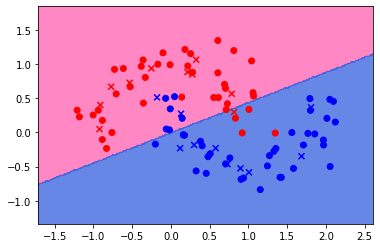

In [7]:
res_plot(LogisticReg.predict, X, y, X_train, X_test, y_train, y_test)

In [8]:
# テストデータに対する予測精度を計算
from sklearn.metrics import accuracy_score
y_pred = LogisticReg.predict(X_test) > 0.5  # 予測値が0.5より大きければ一つ目のクラスと予測する
y_pred = y_pred.astype(np.int)
accuracy_score(y_test, y_pred)

0.85

# ガウス基底関数を使ってみる

In [9]:
class GaussianBasis(object):
    def __init__(self, baseMu, s=1.0):
        self.baseMu = baseMu
        self.s = s
    
    # Xは （データ数 x 特徴数）のサイズの配列
    def __call__(self, X):
        if len(X.shape) == 1:
            X = X[:, np.newaxis]
        gbasis = np.array([np.exp(- np.sum((X - mu)**2, axis=1) / (2 * self.s**2)) for mu in self.baseMu]).T
        return gbasis

In [10]:
# 学習の実行
Phi = GaussianBasis(X_train, s=1.0)
d = Phi.baseMu.shape[0]    # 入力の次元数
LogisticReg = TwoClassLogisticRegression()
LogisticReg.fit(Phi(X_train), y_train, lam=0.001, Tmax=10, bias=False)

(1) Negative log-lilekihood: 54.23335867594318, Loss: 54.23385867594318
(2) Negative log-lilekihood: 15.156559164266477, Loss: 15.709783233802556
(3) Negative log-lilekihood: 8.567600180764277, Loss: 9.085909563410743
(4) Negative log-lilekihood: 5.555889319885977, Loss: 5.995462564080635
(5) Negative log-lilekihood: 3.8437077183036, Loss: 4.404924348921072
(6) Negative log-lilekihood: 2.9054565435578996, Loss: 3.7197799816419117
(7) Negative log-lilekihood: 2.4516567461015235, Loss: 3.528918585997517
(8) Negative log-lilekihood: 2.2934178982644173, Loss: 3.4990996143266146
(9) Negative log-lilekihood: 2.2651582965650228, Loss: 3.4977705410739475
(10) Negative log-lilekihood: 2.264354088347387, Loss: 3.497769367375719


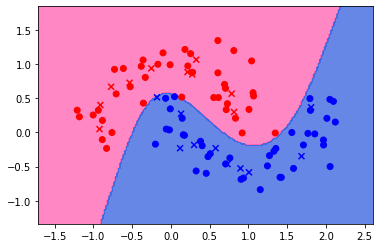

In [11]:
res_plot(LogisticReg.predict, X, y, X_train, X_test, y_train, y_test, Phi=Phi)

In [12]:
# テストデータに対する予測精度を計算
from sklearn.metrics import accuracy_score
y_pred = LogisticReg.predict(Phi(X_test)) > 0.5  # 予測値が0.5より大きければ一つ目のクラスと予測する
y_pred = y_pred.astype(np.int)
accuracy_score(y_test, y_pred)

1.0

# ロジスティック回帰（scikit-learnを使った場合）
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
from sklearn.linear_model import LogisticRegression
sk_logit = LogisticRegression(C=1.0)
sk_logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

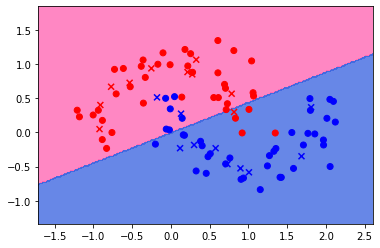

In [14]:
res_plot(sk_logit.predict, X, y, X_train, X_test, y_train, y_test)

In [15]:
# テストデータに対する予測精度を計算
from sklearn.metrics import accuracy_score
y_pred = sk_logit.predict(X_test)
accuracy_score(y_test, y_pred)

0.85

# Scikit-learn組み込みのIrisデータ（３クラス分類）に適用してみる

In [16]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
# 訓練とテストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 学習
clf = LogisticRegression(C=1).fit(X_train, y_train)

In [17]:
# テストデータに対する予測精度を計算
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0